# TensorFlow Fundamentals
> <span style="color:gray"> Created by Toke Faurby ([faur](https://github.com/Faur)).

This Jupyter Notebook contains a very fast introduction to TensorFlow (TF).
This introduciton is **VERY** fast, and leaves many topics untouched or under touched, but should give you enough of an introduction to be able to follow the later notebooks.

TensorFlow is an open source software library for numerical computation that can be used for many things, but is mostly know for its use for deep and machine learning applications.
Since its release in 2015 it has quickly become one of the most popular and most actively developed libraries for deep learning.
TensorFlow represents computations as graphs.
This added layer of abstraction makes TensorFlow very flexible, and allows the same code to be optimized and parallelized for many different types of hardware such as GPUs, clusters, or mobile phones.

Some details of TensorFlow can be a bit confusing, so don't get discouraged if you don't get it right away.
You'll pick them up when you worked with it for some time.

#### External resources
If you want a deeper dive the following are good places to start:

* [Official getting started material](https://www.tensorflow.org/get_started/) - collection of good tutorials from beginer to very advanced.
* [API documentation](https://www.tensorflow.org/api_docs/python/) - Most of the documentation for TF is written into the code, so the best way to figure out how somethings works is often to look it up in the API, and then look at the implementation. The [API guides](https://www.tensorflow.org/api_guides/python/array_ops) can also be very useful sometimes.
* [Keynote (TensorFlow Dev Summit 2017)](https://www.youtube.com/watch?v=4n1AHvDvVvw&t=33s). **30 min video** describing where TensorFlow is right now, and the underlying design principals.
* [TensorFlow at DeepMind (TensorFlow Dev Summit 2017)](https://www.youtube.com/watch?v=VdDmhOCw6J0). **20 min video** describing how TensorFlow is used at DeepMind, and some of the results they have been able to achieve with it.

### What is TensorFlow
TensorFlow provides multiple APIs and can be interfaced using different languages, with Python being the most common, and the focus of this course.
The lowest level API, **TensorFlow Core**, provides you with fine-grained control.
Higher level APIs, such as `Keras` or `tf.contrib.learn`, are built on top of TensorFlow Core.
They help manage data, training, and inference, and are generally faster and easier to use.
This guide begins with an introduction to TensorFlow Core.
Later, in other notebooks, we will demonstrate how to use Tensorflow in a way that is closer to how it is used in the real world.

![](images/tf_overview.png)

Note: The part of TensorFlow is listed under `contrib` (short for contribution) are still in development, and their interface may change.
The rest of TensorFlow is stable within the major release cycle (e.g. `0.x`, `1.x`, ...)

To use TensorFlow you need to understand how TensorFlow:
* Represents computations as graphs.
* Executes graphs in the context of Sessions.
* Represents data as tensors.
* Uses feeds and fetches to get data into and out of arbitrary operations.



### How does TensorFlow work?

The two basic building blocks of a TensorFlow graph are **tensors** and **operations** (called ops for short).
* [**tf.Tensor**](https://www.tensorflow.org/api_docs/python/tf/Tensor): The edges in the graph
    * Tensors are typed multi-dimensional arrays, and are used for data and parameters.
* [**tf.Operation**](https://www.tensorflow.org/api_docs/python/tf/Operation): the nodes in the graph 
    * allows us to perform operations on tensors, resulting in new tensors.



# Part 1: The basics

> In part 1 we will show how some simple computations are performed in TensorFlow, and look at how the computational graph looks.

### Basic operations

Let us begin with a simple example -- 2D **linear regression**: $y = ax + b$.
Where $x$ is the input, $y$ is the output, and $a,~b$ are the parameters.

Before we begin we need to import TensorFlow and some other handy libraries:

In [1]:
## Python 2/3 compatability
from __future__ import absolute_import, division, print_function

## Import libraries
% matplotlib inline
import numpy as np
import datetime
import os
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
from IPython.display import clear_output
sys.path.append(os.path.join('.', '..')) # Allow us to import shared custom 
                                         # libraries, like utils.py
import utils # contain various helper funcitons that aren't 
             # important to understand

For starters let us compute $y$ when $a=2$, and $b=-1$ for a couple of different $x$.


We define the parameters as a special kind of Tensor, called [tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable).
The `tf.Variable` allows us to store and update Tensors in our graph.
Variables are used to build weights for our neural network.
Note you often want to use the wrapper [tf.get_variable](https://www.tensorflow.org/api_docs/python/tf/get_variable).
In this notebook however we will just use `tf.Variable` as it is simpler and easier to understand.


There is an [official tutorial](https://www.tensorflow.org/programmers_guide/variables) that does a good job of explaining `tf.Variables`.


In [2]:
## Building the computational graph

# In case we have already created something: clear it
tf.reset_default_graph()

# Create the two variables
a = tf.Variable(2., name="a")
b = tf.Variable(-1., name="b")
# The 'name' argument indicates what TF should call the variable internally.
# It is a good idea to properly name your ops, as it makes debugging and later 
# analysis much easier! The name is also used when visualizing the graph with 
# TensorBoard, as we will se later.


# Create x, and give it some numbers
x_values = [-2, -1, 0, 1, 2]
x_var = tf.Variable(x_values, name="xVariable", dtype=tf.float32)

# Define y
with tf.name_scope('yFromVariable'): 
    y_from_var = a*x_var + b
# tf.name_scope is used when we wish to give the same name to multiple ops
# or tensors. E.g. here we are both adding and multplying

# Print the results
print(y_from_var)


Tensor("yFromVariable/add:0", shape=(5,), dtype=float32)


#### What just happened?
Why didn't `print(y_from_var)` print out the answer?

You might have expected `y_from_var` to be the results of `a*x_var + b`, but instead we got an **Tensor object**.
This is because TensorFlow works by first creating a computational graph representation.
This is what we created above, i.e. the tensor `y_from_var` is an edge in the computational graph.
To compute anything, a graph must be launched in a `Session`, which compiles the necessary functions and variables such that it can be run.
A `Session` places the graph ops onto `Devices`, such as CPUs or GPUs, and provides methods to execute them.
These methods return [numpy](http://www.numpy.org/) ndarray objects in Python, and as `tensorflow::Tensor` instances in C and C++.

![](images/tf_input_output.png)

Lets compile and run `y_from_var` now!


In [3]:
# TensorFlow operations are performed by 'Sessions'
with tf.Session() as sess: 
    # We almost always need to start by initializes the graph.
    # This tells TensorFlow to fill in the value of the variables.
    sess.run(tf.global_variables_initializer())
    
    # Compute y by running the operation
    y_output = sess.run(y_from_var)

print('y_output is a ' + str(type(y_output)) + '\n')

# Print the results
print('{:4s}  {:4s}'.format('x_var', '  y'))
for i in range(len(x_values)):
    s = "{:4.1f} : {:4.1f}"
    print(s.format(x_values[i], y_output[i]))


y_output is a <class 'numpy.ndarray'>

x_var    y 
-2.0 : -5.0
-1.0 : -3.0
 0.0 : -1.0
 1.0 :  1.0
 2.0 :  3.0


Tada! You have now done a very simple thing in a complicated way.


#### Placeholders
That is all well an good, but what if we wanted to compute this for different values of $x$?
Right now we have defined `x_var` as a `tf.Variable`.
This makes changing it cumbersome.
A better approach is using [tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) are used to feed our input data to the computational graph.
A placeholder can be thought of in the same way as '$x$' in the expression $f(x)=x^2$.
Placeholers lets TensorFlow know that this Tensor is an input to the graph.

A [tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) has 3 important arguments (click link for full documentation):

* **`dtype`** specifying what kind of data we are dealing with. Generally use `tf.float32`, as most GPU's are only optimized for 32 bit floating points.
* **`shape`** lets TF know the dimensions of the variable. Writing `None` allows us to change the number of dimensions, without having to recompile the graph. This however prevents some optimization, so the dimensions should be specified when possible. It is common to provide `None` for the first dimension, which allows us to vary the batch size at runtime.
* **`name`** is what TF will call the placeholder internally. For instance this is the name that will be printed in case that there is an error.


In [4]:
# Create x as a placeholder now!
x_ph = tf.placeholder(dtype=tf.float32, shape=[None], name="xPlaceholder")

# Define another y, using the placeholder x this time
with tf.name_scope('yFromPlaceholder'):
    y_from_ph = a*x_ph + b

x_new_values = [-0.2, -0.1, 0, 0.1, 0.2]

## Compute y
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {x_ph : x_new_values}
    y_output = sess.run(y_from_ph, feed_dict=feed_dict)

    
# Print the results
print('{:4s}  {:4s}'.format(' x_ph', '  y'))
for i in range(len(x_values)):
    s = "{:4.1f} : {:4.1f}"
    print(s.format(x_new_values[i], y_output[i]))

 x_ph    y 
-0.2 : -1.4
-0.1 : -1.2
 0.0 : -1.0
 0.1 : -0.8
 0.2 : -0.6


#### What just happened?

This time, when we created the graph, we created $x$ as a `tf.placeholder`.
This means that `x_ph` is a stand-in for real data, and will be replaced when we actually want to compute something.
So when we want to compute `y` for a particular value we simply **feed** that value into the graph, using a `feed_dict`.

If we wanted to change the values now, we simply need to feed a new value.
In other words, tensorflow creates a separate environment which is accessed through then `Session.run` command.
This is the case both when you want to **feed** information into the tensorflow environment and when you want to **access** information.

**Sessions**, **variables** and **placeholders** can be a little hard to wrap your head around at first.
It can therefore be a good idea to read up on these.
In the descriptions above there are several links to useful documentation and tutorials, have a look whenever there is something you don't understand.


## Examining the graph with TensorBoard

When you execute the cell below you should see a graph that represents the work we have done so far.
Normally TensorBoard is opened in a separate browser window, but for now we will show it in-line.

The TensorBoard graph visualizer is a great tool for examining your model.
It is important to use `tf.name_scope` to dutifully name your variables properly!
Otherwise the graph visualizer quickly becomes unwieldy and useless.
This takes practice, but it is well worth it.
Propper usage of `tf.name_scope` also makes debugging easier, so it is a good habbit to get into.

In this example we embed the graph visualizer in Jupyter.
The visualizer isn't made for this, and not all features are present.
Normally you would access the graph visualizer through **TensorBoard**, as we do at the end of this notebook.
If you are interested in how to embed TensorBoard in the notebook see the `../utils.py` file.

#### External resources
Using TensorBoard makes developing and monitoring deep learning models a lot.
The official tutorials as well as the [README](https://github.com/tensorflow/tensorboard/blob/master/README.md) are very well made and go into a lot more depth about how to use TensorBoard:
*    [Graph visualization](https://www.tensorflow.org/get_started/graph_viz), 
*    [Visualizing Learning](https://www.tensorflow.org/get_started/summaries_and_tensorboard), 
*    [Embedding Visualization](https://www.tensorflow.org/get_started/embedding_viz).

In [8]:
## Launch TensorBoard, and visualize the TF graph
tmp_def = utils.rename_nodes(sess.graph_def, lambda s:"/".join(s.split('_',1)))
utils.show_graph(tmp_def)

Click a node to see its attributes and high level information.
**Double click a node to expand it**.
Try double clicking on one of the y's.
Doing so will show you the operations that are necessary to compute $y$, i.e. a multiplication and an addition.
This is especially useful for examining the dimensions of your data as it flows through the graph (only viewable when TensorBoard is run separately).

**<span style="color:red">Mini-assignment:</span> **
Try and change the argument in `tf.name_scope` when defining `y_from_var` and `y_from_ph` to "`y_variable`", and "`y_placeholder`".
Then run code visualizing TensorBoard again.
* Notice what changed? Can you think of when this kind of naming is smart to do?

## <span style="color:red"> Exercise 1.1: Your first TensorFlow graph</span>
> **NB**: You should **NOT** overwrite any of the variable names, as we need them later!

For the first exercise you must implement Pythagoras' famous equation:
$$c = \sqrt{d^2 + e^2}$$

You should create $e$ and $d$ as placeholders, and then compute $c$ for $d = {3, 2, 1}$ and $e = {4,5,6}$.

It is **important** that you use TF ops for all the computations on the graph.
(e.g. use `tf.square` instead of `np.square`).
Otherwise TF can't optimize the code properly, and you risk it becoming VERY slow.
You can find the TF math ops that you need [here](https://www.tensorflow.org/versions/r0.11/api_docs/python/math_ops/basic_math_functions).


In [6]:
e_values = [3, 2, 1, -1, -2, -3]
d_values = [4, 5, 6,  7,  8,  9]

## Your code here ###
# 1) Define the placeholders
e_ph = tf.placeholder(dtype=tf.float32, shape=[None], name="ePlaceholder")
d_ph = tf.placeholder(dtype=tf.float32, shape=[None], name="dPlaceholder")

# 2) Define the operations of the graph
with tf.name_scope('cFromPlaceholder'):
    c_from_ph = tf.sqrt(tf.square(d_ph) + tf.square(e_ph))

# 3) Start a session, and compute the output
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {e_ph : e_values, d_ph : d_values}
    
    # Use this variable name as your output
    c_output = sess.run(c_from_ph, feed_dict=feed_dict)


In [7]:
## Print out the results, and validate you get the correct values
true_values = np.sqrt(np.square(e_values) + np.square(d_values))
assingment_1_success = True

# Check if your c_output is the same as true_values
for i in range(len(true_values)):
    assingment_1_success = False if not np.abs(true_values[i] - c_output[i]) < 1e-6 else assingment_1_success
    print('Corect value {:4.3f}, your value {:4.3f}. '.format(true_values[i], c_output[i]), end='')
    if not assingment_1_success: 
        print("Oops :(")
        print("\nSometihng went wrong, and the output isn't as expected.\
               \nGo back and have a look, or ask someone for help.")
        break
    print('Correct!')

    
if assingment_1_success:
    print('\nGood job! \nTake a break, strecht your legs, and then continue onwards!')
    

Corect value 5.000, your value 5.000. Correct!
Corect value 5.385, your value 5.385. Correct!
Corect value 6.083, your value 6.083. Correct!
Corect value 7.071, your value 7.071. Correct!
Corect value 8.246, your value 8.246. Correct!
Corect value 9.487, your value 9.487. Correct!

Good job! 
Take a break, strecht your legs, and then continue onwards!


**<span style="color:red">Mini-assignment:</span>**
After having successfully completed the assignment go back and run the TensorBoard visualization code again.
* How does the graph look now?
* Did you remember to give your variables and placeholders meaningful names, or does everything look like a mess?

# Part 2: Linear Regression
> In part 2 we perform linear regression with gradient descent using TensorFlow.
This example is simple, but the techneques and overarching approach is the same for more complex models.

Above we used TF for things that could be done more easily in `numpy`. 
Hardly inspiring.
Here in part 2 we will extend what we learnt in part 1 and begin introducing techniques relevant for deep learning.
We will do this through a linear regression example, but rather than use the ordinary least squares method we will use gradient descent.
Gradient descent is the backbone of the **backpropagation algorithm**, which is used in virtually all deep learning applications.

In case you aren't familiar with gradient descent: don't worry we will cover it properly later.
However Andrew Ng (one of the big names in AI) explains it very well in [this 10 min video](https://www.youtube.com/watch?v=F6GSRDoB-Cg) as part of his [machine learning MOOC](https://www.coursera.org/learn/machine-learning) (which is great!).

But briefly put: You define a differentiable **loss function** (*loss*, *cost*, and somtimes *error* are used interchangably) that somehow measures the amount of error your model is making.
A common approach is to use a distance measure between model predictions and the actual data.
The model parameters are then iteratively updated in the negative direction of the gradients, thus reducing the loss function.

For real valued data we often use the **mean squared error** (MSE) loss function:

$$ loss = \frac{1}{n} \sum^n (y_{true} - y_{estimated})^2$$

This is the loss function we will use in this example.

The first step is to get some data.
We will just create some artificial, well behaved data to start with.
We create both a **training set** and a **validation set**.
The training set is used to tune the model parameters, and the validation set is used to evaluate the model during training.
It is common to also have a **test set** which is used for a final evaluation of the model, when the training is complete.
We won't bother with the test set for now.

In [9]:
##### Creating the data
n_train = 100
n_valid = 20
train_input = np.linspace(-1, 1, n_train)
train_target = - train_input + np.random.randn(*train_input.shape) * 0.4

valid_input = np.linspace(-1, 1, n_valid)
valid_target = - valid_input + np.random.randn(*valid_input.shape) * 0.4


We will reuse the model we defined in part 1.
Before we begin we will visualize the data and the initial (terrible) model.

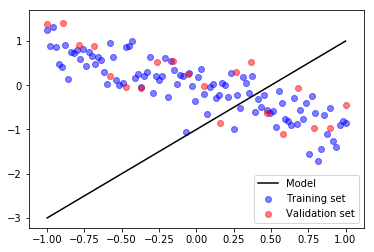

In [10]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    feed_dict = {x_ph : train_input}
    y_output = sess.run(y_from_ph, feed_dict=feed_dict)

plt.plot(train_input, y_output, c='k', label='Model')
plt.scatter(train_input, train_target, c='b', alpha=0.5, label='Training set')
plt.scatter(valid_input, valid_target, c='r', alpha=0.5, label='Validation set')
plt.legend(loc=4)
plt.show()

Next we define the **loss function**, and the TF ops that will update the weights $a$ and $b$.

In [11]:
# We now also need a placeholder for y to compute the loss
y_ph = tf.placeholder(dtype=tf.float32, shape=[None], name='yPlaceholder')

# Define the loss function
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y_ph - y_from_ph))

# Define that we wish to use gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

# And finally create the op that updates our weights a and b
# One of the (many) cool things about TF is that it automatically 
# differentiates the loss function.
train_op = optimizer.minimize(loss, var_list=[a, b])

# We can use TensorBoard to track the training progress. 
# In this case we wish to track the loss
summary_loss = tf.summary.scalar("performance/loss", loss)

Before beginning the training **start TensorBoard**.
Open a terminal and `cd` to the directory that the notebook is in and type:

    tensorboard --logdir=logdir --port=6006

One you have run the above command open a new tab in your browser, and navigate to the '*URL*': 

    http://localhost:6006/

`6006` is the port ID.
The default is `6006`, but you can specify anything you want (that isn't used for something else).

Now that we have everything setup, we can train our model!

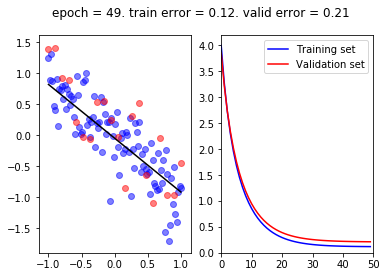

Training complete!


In [12]:
# Define where we want to save the TensorBoard summaries
timestr = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")
logdir = os.path.join('.', 'logdir', timestr)

train_dict={x_ph: train_input, y_ph: train_target}
valid_dict={x_ph: valid_input, y_ph: valid_target}

max_epoch = 50

train_losses = []
valid_losses = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # We use two summary writers. This is a hack that allows us to write 
    # show two plots in the same fiigure in TensorBoard
    summary_writer_train = tf.summary.FileWriter(os.path.join(logdir, 'train'), sess.graph)
    summary_writer_valid = tf.summary.FileWriter(os.path.join(logdir, 'valid'), sess.graph)

    for e in range(max_epoch):
        # Update the parameters, and compute the summary
        train_loss, summary_train, _ = sess.run([loss, summary_loss, train_op], feed_dict=train_dict)
        train_losses.append(train_loss)
        # Note that we don't use the train_op on the validation set!
        valid_loss, summary_valid = sess.run([loss, summary_loss], feed_dict=valid_dict)
        valid_losses.append(valid_loss)

        # Write the summaries
        summary_writer_train.add_summary(summary_train, e)
        summary_writer_valid.add_summary(summary_valid, e)

        ## Visualize the training montage!
        y_output = sess.run(y_from_ph, {x_ph: train_input})
        fig, ax = plt.subplots(1,2)
        fig.suptitle('epoch = {:2}. train error = {:4.2}. valid error = {:4.2}'.format(e, train_loss, valid_loss) )

        ax[0].plot(train_input, y_output, c='k', label='Model')
        ax[0].scatter(train_input, train_target, c='b', alpha=0.5, label='Training set')
        ax[0].scatter(valid_input, valid_target, c='r', alpha=0.5, label='Validation set')
        
        ax[1].plot(range(len(train_losses)), train_losses, c='b', label='Training set')
        ax[1].plot(range(len(valid_losses)), valid_losses, c='r', label='Validation set')
        ax[1].set_xlim([0, max_epoch])
        ax[1].set_ylim([0, None])
        ax[1].legend(loc=1)

        clear_output(wait=True)
        plt.show()

print('Training complete!')

We can see how the loss changes as a function of epochs.
This plot is called the **learning curves**.
We often want to use TensorBoard, rather manually plotting.

The learning curves can tell you a lot about how the network is doing, and how well the training is going.
In this case they look close to ideal, that is:
* Training and validation loss follow each other closely
* The loss asymptotes to a *low value* (what low means depends on application)

In many cases the learning curves won't be this nice, and later we will go into more depth about what can be read from them.

While in TensorBoard have a look at the **graphs** tab, and look at how it changed since the first time we looked at it.

**<span style="color:red">Mini-assignment:</span>**
The training error will generally be worse than the validation error.
* Why is that? 

*[Don't worry if you can't figure it out, we will cover this later :) ]*

In [ ]:
Stop criteria is on the validation error ?